In [3]:
import pandas as pd

# Load the dataset
file_path = 'data.csv'
data = pd.read_csv(file_path, delimiter=';')

# Data cleaning
data['Terakhir'] = data['Terakhir'].str.replace(',', '.').astype(float)
data['Pembukaan'] = data['Pembukaan'].str.replace(',', '.').astype(float)
data['Tertinggi'] = data['Tertinggi'].str.replace(',', '.').astype(float)
data['Terendah'] = data['Terendah'].str.replace(',', '.').astype(float)
data['Perubahan%'] = data['Perubahan%'].str.replace('%', '').str.replace(',', '.').astype(float)
data['Vol.'] = data['Vol.'].str.replace('K', '').str.replace(',', '.').astype(float) * 1000

# Convert 'Tanggal' to datetime
data['Tanggal'] = pd.to_datetime(data['Tanggal'], format='%d/%m/%Y')
data = data.sort_values('Tanggal')  # Ensure data is sorted by date
data.set_index('Tanggal', inplace=True)

# Set frequency of the datetime index
data = data.asfreq('B')  # Assuming the data frequency is business days

# Fill missing values with the mean of each column
data.fillna(data.mean(), inplace=True)

# Create dummy variables for missing values
for column in ['Pembukaan', 'Tertinggi', 'Terendah', 'Vol.', 'Perubahan%']:
    data[f'{column}_dummy'] = np.where(data[column].isnull(), 1, 0)

data


,Terakhir,Pembukaan,Tertinggi,Terendah,Vol.,Perubahan%,Pembukaan_dummy,Tertinggi_dummy,Terendah_dummy,Vol._dummy,Perubahan%_dummy
Tanggal,,,,,,,,,,,
2024-04-30,18.890000,19.105000,19.150000,18.850000,150.000000,-1.100000,0,0,0,0,0
2024-05-01,18.970000,19.085000,19.165000,19.085000,20.000000,0.420000,0,0,0,0,0
2024-05-02,18.170000,18.445000,18.445000,18.300000,10.000000,-4.220000,0,0,0,0,0
2024-05-03,18.740000,18.650000,18.650000,18.650000,0.000000,3.140000,0,0,0,0,0
2024-05-06,18.405000,18.400000,18.420000,18.180000,10.000000,-1.790000,0,0,0,0,0
2024-05-07,18.295000,18.405000,18.405000,18.405000,0.000000,-0.600000,0,0,0,0,0
2024-05-08,18.315000,18.400000,18.483000,18.395000,224.705882,0.110000,0,0,0,0,0
2024-05-09,18.685000,18.440000,19.005000,18.440000,224.705882,2.020000,0,0,0,0,0
2024-05-10,19.255000,18.760000,18.840000,18.760000,0.000000,3.050000,0,0,0,0,0


In [4]:
# Configuration dictionary
config = {
    'target': 'Terakhir',
    'exogenous': ['Pembukaan', 'Tertinggi', 'Terendah', 'Vol.', 'Perubahan%', 
                  'Pembukaan_dummy', 'Tertinggi_dummy', 'Terendah_dummy', 'Vol._dummy', 'Perubahan%_dummy'],
    'order': (2, 3, 4),
    'seasonal_order': (1, 1, 1, 12)
}

# Prepare data
y = data[config['target']]
X = data[config['exogenous']]

# Split the data into training and testing sets
train_size = int(len(data) * 0.8)
y_train, y_test = y[:train_size], y[train_size:]
X_train, X_test = X[:train_size], X[train_size:]

print(f"Training set size: {len(y_train)}")
print(f"Testing set size: {len(y_test)}")


Training set size: 17
Testing set size: 5


In [5]:
import statsmodels.api as sm
import warnings
import os
import pickle

# Nama file untuk menyimpan model
model_filename = 'sarimax_model.pkl'

if os.path.exists(model_filename):
    # Jika model sudah ada, muat model yang disimpan
    with open(model_filename, 'rb') as file:
        model_fit = pickle.load(file)
else:
    # Suppress warnings
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")

        # Fit the SARIMAX model
        model = sm.tsa.SARIMAX(y_train, exog=X_train, order=config['order'], seasonal_order=config['seasonal_order'])
        model_fit = model.fit(disp=False)
    
    # Simpan model yang telah dilatih
    with open(model_filename, 'wb') as file:
        pickle.dump(model_fit, file)

# Display model summary
model_summary = model_fit.summary()
print(model_summary)


                                     SARIMAX Results                                      
Dep. Variable:                           Terakhir   No. Observations:                   17
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                  21.732
Date:                            Wed, 26 Jun 2024   AIC                            -13.463
Time:                                    06:29:22   BIC                            -22.669
Sample:                                04-30-2024   HQIC                           -33.664
                                     - 05-22-2024                                         
Covariance Type:                              opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Pembukaan            1.2641   1.49e-22   8.46e+21      0.000       1.264       1.264
Tertinggi        

c:\Users\Hizamrul\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:3015: RuntimeWarning: invalid value encountered in divide
  return self.params / self.bse
c:\Users\Hizamrul\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:3159: UserWarning: Early subset of data for variable 0 has too few non-missing observations to calculate test statistic.
  test_statistic, p_value = breakvar_heteroskedasticity_test(
c:\Users\Hizamrul\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:3159: UserWarning: Later subset of data for variable 0 has too few non-missing observations to calculate test statistic.
  test_statistic, p_value = breakvar_heteroskedasticity_test(


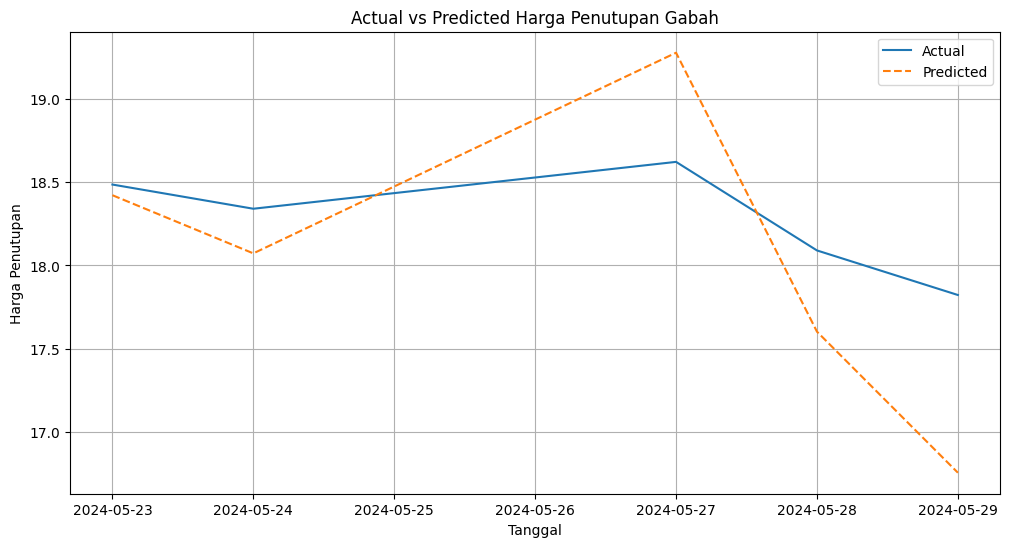

In [6]:
import matplotlib.pyplot as plt

# Make predictions
y_pred = model_fit.predict(start=len(y_train), end=len(y_train)+len(y_test)-1, exog=X_test)
y_pred.index = y_test.index  # Align the prediction index with the test data index

# Create a DataFrame to display the results
result_df = pd.DataFrame({
    'Tanggal': y_test.index,
    'Data Asli': y_test.values,
    'Hasil Prediksi': y_pred.values,
    'Selisih': y_test.values - y_pred.values,
    'Persentase Selisih': ((y_test.values - y_pred.values) / y_test.values) * 100
})

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred, label='Predicted', linestyle='--')
plt.title('Actual vs Predicted Harga Penutupan Gabah')
plt.xlabel('Tanggal')
plt.ylabel('Harga Penutupan')
plt.legend()
plt.grid(True)
plt.show()


In [7]:
# Display the result DataFrame in a more readable table format
from IPython.display import display

display(result_df)


,Tanggal,Data Asli,Hasil Prediksi,Selisih,Persentase Selisih
0,2024-05-23,18.485000,18.421039,0.063961,0.346016
1,2024-05-24,18.340000,18.072512,0.267488,1.458497
2,2024-05-27,18.620857,19.275093,-0.654236,-3.513459
3,2024-05-28,18.090000,17.603209,0.486791,2.690940
4,2024-05-29,17.823000,16.757788,1.065212,5.976612


In [8]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Calculate RMSE, MSE, MPE, MAPE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mpe = np.mean((y_test - y_pred) / y_test) * 100
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Create a DataFrame to display the metrics
metrics_df = pd.DataFrame({
    'Metric': ['RMSE', 'MSE', 'MAE', 'MPE', 'MAPE'],
    'Value': [rmse, mse, mae, mpe, mape]
})

# Display the metrics DataFrame
from IPython.display import display

display(metrics_df)


,Metric,Value
0,RMSE,0.612423
1,MSE,0.375061
2,MAE,0.507538
3,MPE,1.391721
4,MAPE,2.797105


,Tanggal,Data Asli,Hasil Prediksi,Selisih,Persentase Selisih
0,2024-05-06,18.405,32.050892,-13.645892,-74.142312
1,2024-05-03,18.740,19.228115,-0.488115,-2.604667
2,2024-05-02,18.170,17.609421,0.560579,3.085192
3,2024-05-01,18.970,18.953094,0.016906,0.089120
4,2024-04-30,18.890,18.019596,0.870404,4.607752


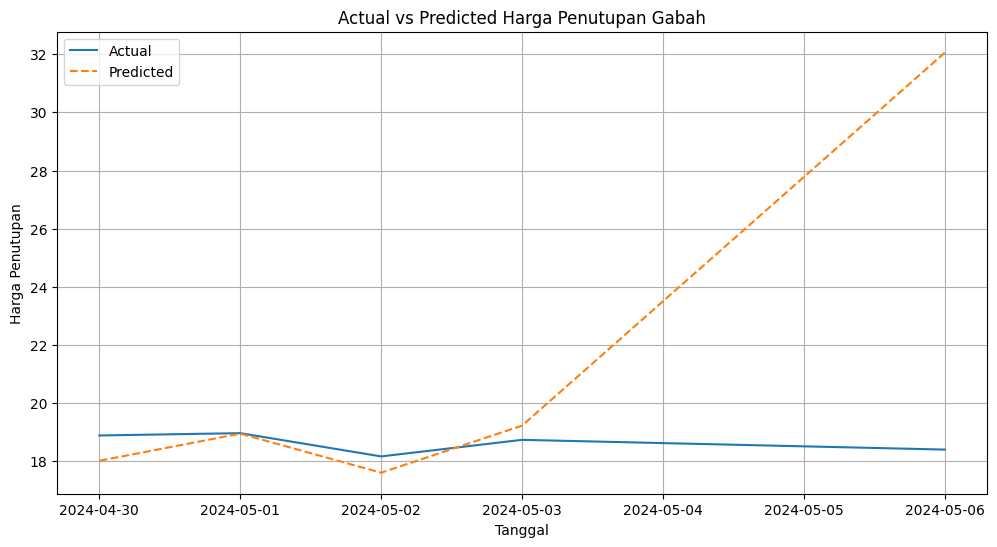

,Metric,Value
0,RMSE,6.124064
1,MSE,37.504155
2,MAE,3.116379
3,MPE,-13.792983
4,MAPE,16.905809


In [9]:
# Load the test dataset
test_data_path = 'data_test.csv'
data_test = pd.read_csv(test_data_path, index_col='Tanggal', parse_dates=True)

# Prepare the test data (ensure dummy variables are present in test data)
for column in ['Pembukaan', 'Tertinggi', 'Terendah', 'Vol.', 'Perubahan%']:
    data_test[f'{column}_dummy'] = np.where(data_test[column].isnull(), 1, 0)

# Prepare the test data
y_test = data_test[config['target']]
X_test = data_test[config['exogenous']]

# Make predictions using the loaded model
y_pred = model_fit.predict(start=0, end=len(y_test)-1, exog=X_test)
y_pred.index = y_test.index  # Align the prediction index with the test data index

# Create a DataFrame to display the results
result_df = pd.DataFrame({
    'Tanggal': y_test.index,
    'Data Asli': y_test.values,
    'Hasil Prediksi': y_pred.values,
    'Selisih': y_test.values - y_pred.values,
    'Persentase Selisih': ((y_test.values - y_pred.values) / y_test.values) * 100
})

# Display the result DataFrame in a more readable table format
from IPython.display import display

display(result_df)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred, label='Predicted', linestyle='--')
plt.title('Actual vs Predicted Harga Penutupan Gabah')
plt.xlabel('Tanggal')
plt.ylabel('Harga Penutupan')
plt.legend()
plt.grid(True)
plt.show()

# Calculate RMSE, MSE, MPE, MAPE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mpe = np.mean((y_test - y_pred) / y_test) * 100
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Create a DataFrame to display the metrics
metrics_df = pd.DataFrame({
    'Metric': ['RMSE', 'MSE', 'MAE', 'MPE', 'MAPE'],
    'Value': [rmse, mse, mae, mpe, mape]
})

# Display the metrics DataFrame
display(metrics_df)


In [11]:
import pandas as pd

# Memuat DataFrame yang sudah ada dari tahapan sebelumnya
# result_df sudah mengandung kolom Tanggal, Data Asli, Hasil Prediksi, Selisih, Persentase Selisih

# Membuat DataFrame yang berisi metrik evaluasi
metrics_df = pd.DataFrame({
    'Metric': ['RMSE', 'MSE', 'MAE', 'MPE', 'MAPE'],
    'Value': [rmse, mse, mae, mpe, mape]
})

# Menggabungkan data awal dengan hasil prediksi
full_result_df = pd.merge(data_test.reset_index(), result_df, on='Tanggal', how='inner')

# Menghapus kolom _dummy dari DataFrame
columns_to_drop = [col for col in full_result_df.columns if '_dummy' in col]
full_result_df_cleaned = full_result_df.drop(columns=columns_to_drop)

# Menulis DataFrame hasil prediksi ke dalam file Excel
with pd.ExcelWriter('prediksi_harga_gabah.xlsx') as writer:
    full_result_df_cleaned.to_excel(writer, sheet_name='Prediksi', index=False)
    metrics_df.to_excel(writer, sheet_name='Metrik', index=False)

print("File prediksi_harga_gabah.xlsx telah berhasil dibuat.")


File prediksi_harga_gabah.xlsx telah berhasil dibuat.
